In [1]:
%matplotlib inline
from sklearn.datasets import fetch_openml

In [2]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, data_home="./scikit_learn_data")

In [3]:
print("Image Data Shape" , X.shape)

print("Label Data Shape", y.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7.0, random_state=0)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


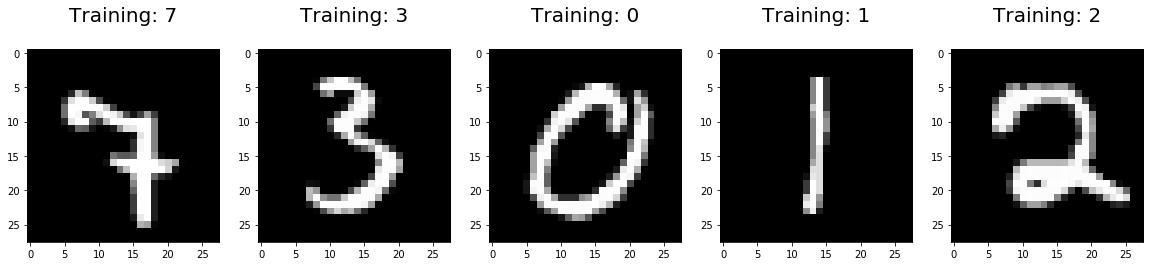

In [7]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

In [8]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scale = scaler.fit_transform(X_train)

# X_test_scale = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [14]:
clf = LogisticRegression(solver='lbfgs', multi_class='ovr', verbose=1)

In [15]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)

In [16]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/pavan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pavan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pavan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pavan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/pavan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=1,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
print(clf.cv_results_)

{'mean_fit_time': array([184.82797488, 179.73073022, 182.9865845 , 199.18817107,
       191.09644087, 187.38933905, 141.67744565]), 'std_fit_time': array([ 0.57334651,  4.9660791 ,  9.93183747,  0.4662947 ,  0.49055178,
        3.02709883, 60.52081051]), 'mean_score_time': array([0.15407268, 0.20423007, 0.14875555, 0.43761277, 0.25980012,
       0.1666193 , 0.09109735]), 'std_score_time': array([0.01281677, 0.08980052, 0.02453037, 0.14876241, 0.12842326,
       0.0222592 , 0.02303308]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.9105179 , 0.9095181 , 0.90911818, 0.90946811, 0.90981804,
       0.910018  , 0.90966807]), 'split1_test_score': array([0.9120456 , 0.91219561, 0.91239562, 0.91244562, 0.91279564,
       0.9124456

In [18]:
print(clf.best_params_)

{'C': 0.01}


In [19]:
sparsity = np.mean(clf.best_estimator_.coef_ == 0) * 100
score = clf.score(X_test, y_test)
print('Best C % .4f' % clf.best_estimator_.C)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Best C  0.0100
Sparsity with L1 penalty: 8.93%
Test score with L1 penalty: 0.9103


Text(0.5, 0.98, 'Classification vector for...')

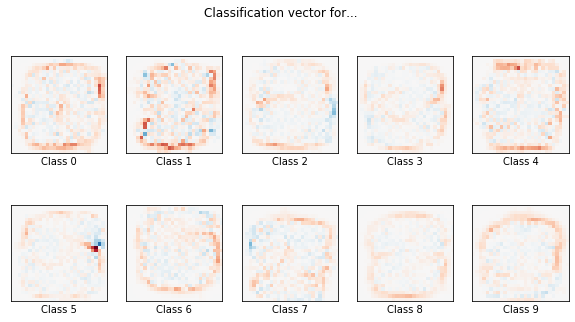

In [20]:
coef = clf.best_estimator_.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

In [21]:
from sklearn import metrics

In [22]:
predictions = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 971    0    2    2    1    5   10    0    5    0]
 [   0 1113    6    2    1    4    3    2    9    1]
 [   9   14  914   21   11    2   13   11   42    3]
 [   4    5   43  878    1   23    3   12   26   18]
 [   1    2    5    1  896    1    9    5   10   32]
 [  10    2    5   36   11  726   19    4   37   13]
 [   5    2    9    0    4   17  941    2    8    1]
 [   4    5   24    1   14    2    1  971    6   36]
 [   3   16   10   25    5   23    6    6  845   24]
 [   2    7   10   15   36    9    1   31   10  848]]


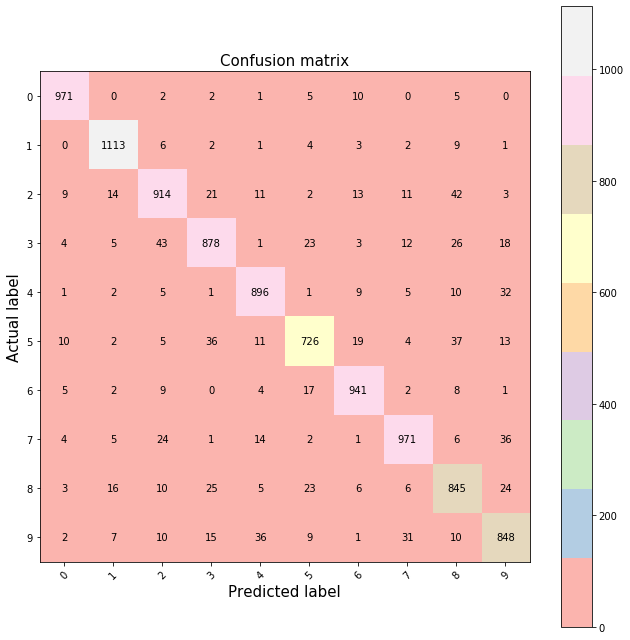

In [23]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape 
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')